# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# %matplotlib notebook

In [9]:
df = pd.read_csv('b1abb33c4f.csv')
df.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [15]:
def categoriza_apgar5(valor):
    if 0 <= valor <= 3:
        return 'asfixia grave'
    elif 4 <= valor <= 5:
        return 'asfixia moderada'
    elif 6 <= valor <= 7:
        return 'asfixia leve'
    elif 8 <= valor <= 10:
        return 'normal'
    else:
        return 'não categorizado'

df['categoria_apgar5'] = df['APGAR5'].apply(categoriza_apgar5)
df.head(5)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,categoria_apgar5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


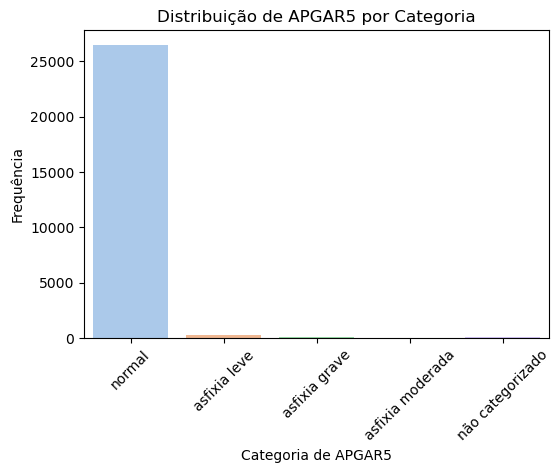

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='categoria_apgar5', palette='pastel')
plt.title('Distribuição de APGAR5 por Categoria')
plt.xlabel('Categoria de APGAR5')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

In [16]:
df_filtrado = df[['APGAR5', 'SEXO', 'GESTACAO']].dropna()

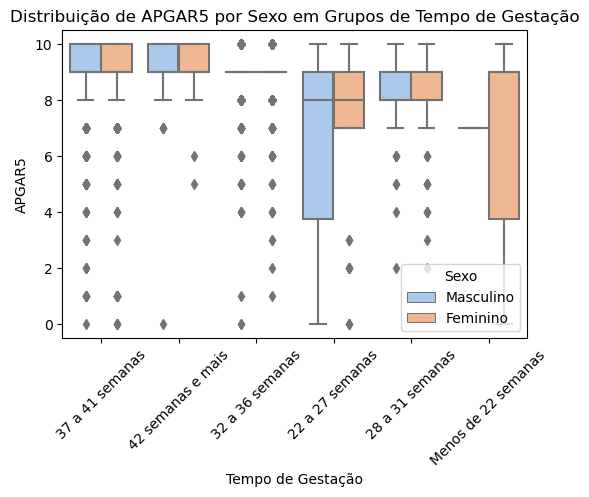

In [21]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df_filtrado, palette='pastel')
plt.title('Distribuição de APGAR5 por Sexo em Grupos de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


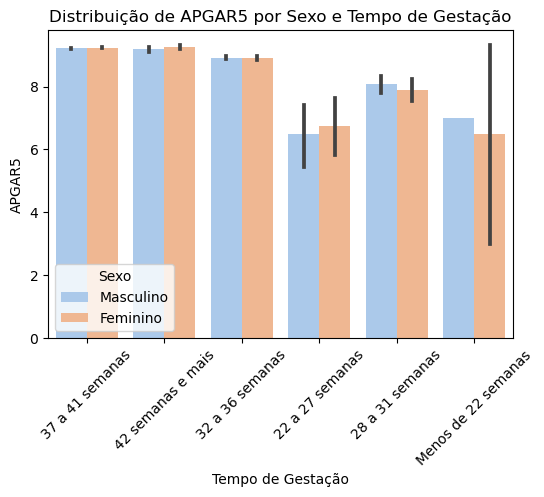

In [22]:
plt.figure(figsize=(6, 4))
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df_filtrado, palette='pastel')
plt.title('Distribuição de APGAR5 por Sexo e Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.xticks(rotation=45)
plt.legend(title='Sexo')
plt.show()


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [88]:
tabela_cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])
tabela_cruzada

APGAR5,0.0,1.0,10.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,nan
GESTACAO,,,,,,,,,,,,
22 a 27 semanas,7,0,8,8,6,1,0,2,10,24,19,1
28 a 31 semanas,0,0,13,2,1,5,7,7,11,61,55,3
32 a 36 semanas,2,2,465,2,2,8,11,17,56,362,1307,15
37 a 41 semanas,5,20,7284,3,5,7,21,45,151,1417,13565,66
42 semanas e mais,1,0,223,0,0,0,1,1,5,44,423,2
Menos de 22 semanas,1,0,1,1,0,0,0,0,1,0,3,0


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [89]:
# Calculando os percentuais de linha
percentuais_linha = tabela_cruzada.iloc[:, 1:].apply(lambda x: (x / x.sum()) * 100, axis=1).reset_index()

# Exibindo os resultados
percentuais_linha


APGAR5,GESTACAO,1.0,10.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,nan
0,22 a 27 semanas,0.000000,10.126582,10.126582,7.594937,1.265823,0.000000,2.531646,12.658228,30.379747,24.050633,1.265823
1,28 a 31 semanas,0.000000,7.878788,1.212121,0.606061,3.030303,4.242424,4.242424,6.666667,36.969697,33.333333,1.818182
2,32 a 36 semanas,0.089008,20.694259,0.089008,0.089008,0.356030,0.489542,0.756564,2.492212,16.110369,58.166444,0.667557
3,37 a 41 semanas,0.088558,32.252922,0.013284,0.022140,0.030995,0.092986,0.199256,0.668615,6.274354,60.064648,0.292242
4,42 semanas e mais,0.000000,31.902718,0.000000,0.000000,0.000000,0.143062,0.143062,0.715308,6.294707,60.515021,0.286123
5,Menos de 22 semanas,0.000000,16.666667,16.666667,0.000000,0.000000,0.000000,0.000000,16.666667,0.000000,50.000000,0.000000


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

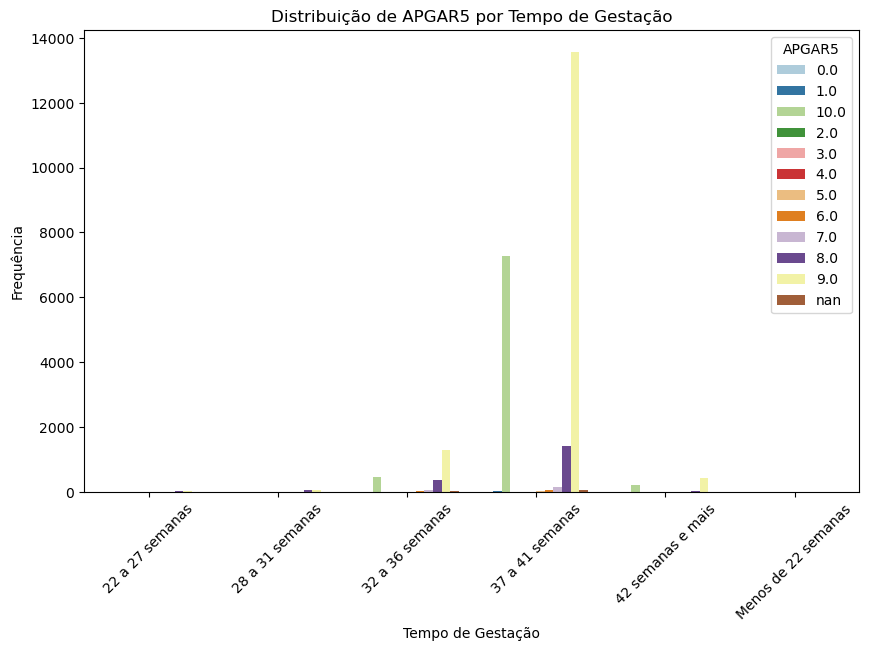

In [100]:
# Preparando os dados para o gráfico
df_long = pd.melt(tabela_cruzada.reset_index(), id_vars=['GESTACAO'], var_name='APGAR5', value_name='Frequência')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x='GESTACAO', y='Frequência', hue='APGAR5', palette='Paired')
plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

#Não há, necessariamante, uma relação direta entre o nascimento de bebês antes das 37 semanas de gestação com complicações vindas do baixo grau
#da variável APGAR5. Como mostra o gráfico, em bebês nascidos antes das 37 semanas ainda há uma dominânica de valores acima de 7 para APGAR5.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

In [103]:
df_clean = df.dropna(subset=['APGAR5', 'PESO'])
df_clean.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea,categoria_apgar5
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273,normal
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025,normal


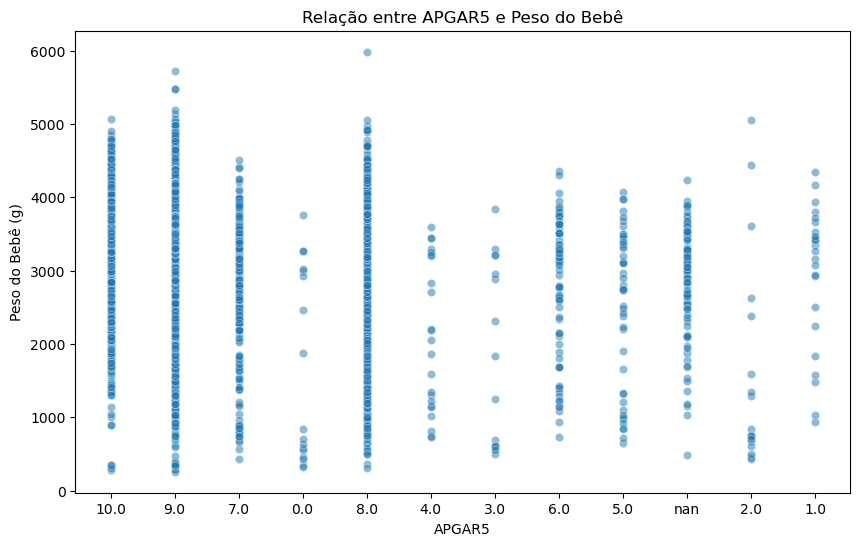

In [104]:
#por meio de um gráfico de dispersão:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='APGAR5', y='PESO', data=df_clean, alpha=0.5)
plt.title('Relação entre APGAR5 e Peso do Bebê')
plt.xlabel('APGAR5')
plt.ylabel('Peso do Bebê (g)')
plt.show()


In [106]:
correlacao = df_clean['APGAR5'].corr(df_clean['PESO'])
print(correlacao)

0.16821001802434465
